In [136]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
import imutils
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries, find_boundaries
from skimage.util import img_as_float
import matplotlib.patches as patches
%matplotlib inline

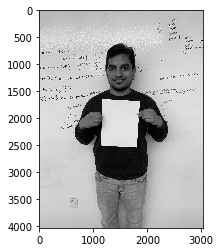

In [32]:
filename = '../images/rajeev.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap = 'gray')
plt.show()

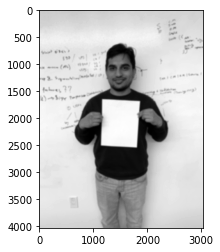

In [33]:
r = 75
img_gaussian = cv2.GaussianBlur(gray,(r,r),0)
plt.imshow(img_gaussian, cmap = 'gray')
plt.show()

In [54]:
r_img = imutils.resize(img, width=int(0.1*np.shape(img)[1]))

In [35]:
from skimage.filters import roberts

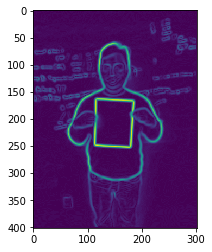

In [140]:
r = 9
r_img = imutils.resize(img, width=int(0.1*np.shape(img)[1]))
filt_img = cv2.GaussianBlur(r_img[:,:,0],(r,r),0)
img_roberts = roberts(filt_img)
plt.imshow(img_roberts)
img_roberts = cv2.normalize(src=img_roberts, dst=None, alpha=0, beta=255, 
               norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

In [141]:
#img_roberts.convertTo(img_roberts, CV_8UC1, 1/256.0)
cnts = cv2.findContours(img_roberts, mode = 3, method = 1)
cnts = cv2.findContours(img_roberts, cv2.RETR_EXTERNAL, 
                        cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

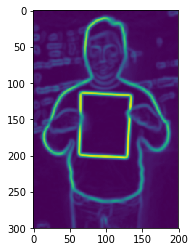

In [142]:
c_top, c_bottom = 50, 350
c_left, c_right = 50, 250
crop = img_roberts[c_top:c_bottom, c_left:c_right]
#crop = img_roberts[:,:]
bi = cv2.bilateralFilter(crop, 5, 75, 75)
plt.imshow(bi)

In [143]:
dst = cv2.cornerHarris(bi, 2, 3, 0.04)

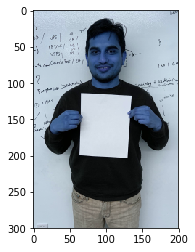

In [144]:
r_img_crop = r_img[c_top:c_bottom, c_left:c_right]
mask = np.zeros_like(r_img_crop)

#--- applying a threshold and turning those pixels above the threshold to black ---
corners = dst > 0.5*dst.max()
plt.imshow(r_img_crop)

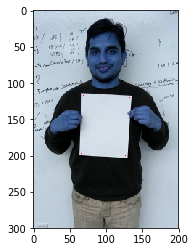

In [145]:
r_img_copy = r_img[c_top:c_bottom, c_left:c_right,:]
r_img_copy[corners] = [255,0,0]
plt.imshow(r_img_copy)

In [146]:
corners_loc = np.where(corners)
xy_corners = list(zip(corners_loc[1], corners_loc[0]))
xy_corners
index = list(range(0, len(xy_corners)))

In [147]:
from itertools import combinations
index_combinations = list(combinations(index, 4)) 
index_combinations

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 4, 5),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 4, 5),
 (0, 3, 4, 5),
 (1, 2, 3, 4),
 (1, 2, 3, 5),
 (1, 2, 4, 5),
 (1, 3, 4, 5),
 (2, 3, 4, 5)]

In [148]:
def getXYforIndices(all_x, all_y, indices):
    x = []
    y = []
    for index in indices:
        x.append(all_x[index])
        y.append(all_y[index])
    return x, y

In [149]:
xy_combinations = []
for comb in index_combinations:
    xy_combinations.append(getXYforIndices(corners_loc[1], corners_loc[0], comb))
xy_combinations

[([69, 132, 133, 66], [117, 120, 120, 197]),
 ([69, 132, 133, 67], [117, 120, 120, 197]),
 ([69, 132, 133, 127], [117, 120, 120, 200]),
 ([69, 132, 66, 67], [117, 120, 197, 197]),
 ([69, 132, 66, 127], [117, 120, 197, 200]),
 ([69, 132, 67, 127], [117, 120, 197, 200]),
 ([69, 133, 66, 67], [117, 120, 197, 197]),
 ([69, 133, 66, 127], [117, 120, 197, 200]),
 ([69, 133, 67, 127], [117, 120, 197, 200]),
 ([69, 66, 67, 127], [117, 197, 197, 200]),
 ([132, 133, 66, 67], [120, 120, 197, 197]),
 ([132, 133, 66, 127], [120, 120, 197, 200]),
 ([132, 133, 67, 127], [120, 120, 197, 200]),
 ([132, 66, 67, 127], [120, 197, 197, 200]),
 ([133, 66, 67, 127], [120, 197, 197, 200])]

In [150]:
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

In [151]:
largest_area = 0
best_rectangle = ([],[])
for xy_comb in xy_combinations:
    area = PolyArea(xy_comb[0], xy_comb[1])
    if area > largest_area:
        largest_area = area
        best_rectangle = (xy_comb[0], xy_comb[1])

In [152]:
best_rectangle

([69, 132, 133, 127], [117, 120, 120, 200])

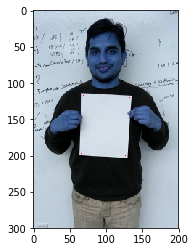

In [155]:
fig, ax = plt.subplots(1)

# Display the image
ax.imshow(r_img_crop)